# Beautiful Soup Tutorial 

<img src="../assets/beautifulsoup.jpg" alt="beautifulSoup" width="800"/>

### What is Beautiful Soup? 

<img src="../assets/datascrapememe.jpeg" alt="beautifulSoup" width="800"/>

A library for parsing information from a web page's HTML or XML code. This can include text data, links, images, and specific elements (titles, sections) from webpages. 

Beautiful Soup was created by Leonard Richardson, initially released in 2004. The last updated version (4) was released in April of 2023. It is only supported in Python.


### Why Beautiful Soup? 

<img src="../assets/bsmeme.jpeg" alt="beautifulSoup" width="400"/>


Beautiful Soup provides a way to easily scrape data from a website that is not readily available as a .csv. It transforms the website data into specific python objects, which can be helpful for navigating, searching, and modifying data from the web.

There are other libraries that have similar functions such as Selenium or Scrapy. BeautifulSoup is known for it's speed and is better for smaller scale simple web-scraping tasks. Selenium includes more options, for example, navigating between multiple pages and button clicks. Scrapy is best suited for large more complex scraping because it is a framework and does not require knowledge of Python to use.

TLDR: The advantage of Beautiful Soup is that it's simple, fast, and relatively easy to learn in comparison to other scrapers. 

To Note: Web scraping can be risky depending on privacy policies of pages. Make sure to read the details of each website's policies prior to scrubbing the data. You can check the 'robots.txt' file on a website to determine if the data is publically accessible. 



### Installation Instructions:
1. Run this in your terminal: 
```python
    pip install beautifulsoup4
```

2. Add the libraries at the top of your code:
```python
    from bs4 import BeautifulSoup
    import requests

``````

    Note on Dependencies:   

    -Use the "beautiful_group_3" environment
    -Import "requests-html" if you want to request dynamically generated content, handle authentication




## Key Functions within Beautiful Soup
#### get the title of a page
print(soup.title)

#### get attributes of the page:
print(soup.title.name)

#### get text values on the page:
print(soup.title.string)

#### beginning navigation:
print(soup.title.parent.name)

#### getting specific values:
print(soup.p)

#### get anchor tags on the page:

#### get tables from the page:


### Tutorial 
-insert Oksana's tutorial video here-
-insert code chunks for parsing data into a dataframe-



Example:

In [5]:
#Import Libraries Needed
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests


In [6]:
# Define the URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/Vermont'

# Send an HTTP GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
else:
    print('Failed to retrieve the Wikipedia page.')
    exit()

# Create a Beautiful Soup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find all tables in the content
tables = soup.find_all('table')

# Check if the fourth table exists (Population by Race table)
if len(tables) > 3:
    table = tables[3]
else:
    print('Population by Race table not found on the page.')
    exit()

# Parse and process the table data
if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all(['td', 'th'])
        row_data = [cell.get_text(strip=True) for cell in cells]
        print(row_data)


['Town', 'Population']
['Essex', '22,094']
['Colchester', '17,524']
['Bennington', '15,333']
['Brattleboro', '12,184']
['Milton', '10,723']
['Hartford', '10,686']
['Williston', '10,103']
['Middlebury', '9,152']
['Springfield', '9,062']
['Barre', '7,923']
['Shelburne', '7,717']
['St. Johnsbury', '7,364']


In [7]:
#Get the data into a structured format: 
# Parse the table data and store it in a list of lists
table_data = []
if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all(['td', 'th'])
        row_data = [cell.get_text(strip=True) for cell in cells]
        table_data.append(row_data)

# Convert the list of lists into a Pandas DataFrame
df = pd.DataFrame(table_data[1:], columns=table_data[0])

# Print the DataFrame
print(df)

             Town Population
0           Essex     22,094
1      Colchester     17,524
2      Bennington     15,333
3     Brattleboro     12,184
4          Milton     10,723
5        Hartford     10,686
6       Williston     10,103
7      Middlebury      9,152
8     Springfield      9,062
9           Barre      7,923
10      Shelburne      7,717
11  St. Johnsbury      7,364


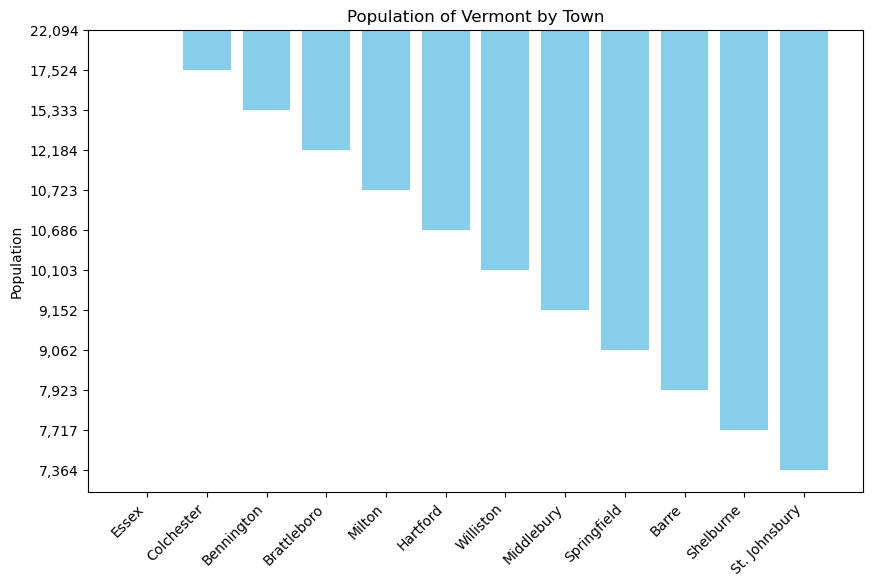

In [8]:
#Plot the data: 
plt.figure(figsize=(10, 6))
plt.bar(df['Town'], df['Population'], color='skyblue')
plt.ylabel('Population')
plt.title('Population of Vermont by Town')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()


# Display the chart
plt.show()

### Potential Use in Environmental Data Science:

- **Environmental Monitoring**: Web scraping enables the retrieval of real-time or near-real-time data regularly updated from multiple sources (e.g., air quality, weather monitoring). This provides a timely and accurate view of specific environmental issues.

- **Environmental Data Collection**: It allows for the collection of data from sources that do not always offer direct access to the source data (e.g., PDFs, Internet archives, government reports, NGOs reports, DataONE xml files, data in shiny apps). 

- **Extraction and Organization of Data from Remote Sensing Sources**: This includes data from satellite imagery and aerial drones.

- **Ability to Scrape Data from Various Sources with Varying Formats**: This capability enables the monitoring and analysis of emerging environmental patterns (e.g., wildlife populations, habitat quality, urban ecosystems).



### Limitations & Permissioning:

* Beautifulsoup4 is great for working with smaller data sets from static webpages (blogs, Wikipedia pages, any "read only" pages), but not great if you're looking to a whole website or very large data sets

* Only parses data, so you'll need another tool (like requests) to extract the data

* Only works with python

* Only works for HTML or XML files (will NOT work for JavaScript rendered web pages)

### Other Options for More Complex Web Scraping:

* Scrapy -> good for large-scale data

* Selenium -> can handle dynamic web pages



### Resources: 
Project is located here:

https://github.com/fletcher-m/group3_project 

About Beautiful Soup:

https://realpython.com/beautiful-soup-web-scraper-python/

Additional Resources:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.topcoder.com/thrive/articles/web-scraping-with-beautiful-soup
